# CCT College

###### Module Title(s):	
Machine Learning for AI
###### Lecturer Name(s):	
David McQuaid
###### Assessment Title:	
ML_CA1
###### Student Name: 
Tamiris Rodrigues Duarte
###### Student Number:
2020294
###### Due Date (Deadline):	
22th April 2024

###### GitHub:	
https://github.com/tamirisrd/ML_CA1

#### Scenario:
This is a data set which contains over 65K attempts to access a firewall. There is a single categorical feature “Action”, that contains 4 categories – “allow, deny, drop, reset-both”.
Your task is to create a classification model that will predict the class of incoming traffic to the firewall. 

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.preprocessing as preproc
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# read file
df = pd.read_csv("log2.csv")
df.head()

# df_churn_pd = df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


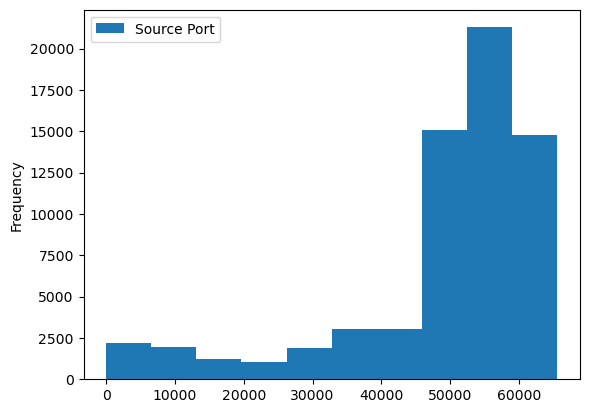

In [41]:
df.plot(x='Action', y='Source Port', kind = 'hist')
plt.show()

In [42]:
# Categorical columns 

cat_col_df = ['Source Port', 'Destination Port', 'Action']

impute_cat = SimpleImputer (strategy='most_frequent')
onehot_cat = OneHotEncoder(handle_unknown='ignore')
cat_transformer = Pipeline(steps=[('impute', impute_cat),('onehot',onehot_cat)])

print(cat_col_df)

['Source Port', 'Destination Port', 'Action']


In [43]:
# Numerical columns

num_col = df.select_dtypes(include=[np.float64,np.int64]).columns

scaler_num = StandardScaler()

num_col_trans = Pipeline(steps=[('scale', scaler_num)])

print(num_col)


Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'],
      dtype='object')


In [44]:
cat_col_prepro = ColumnTransformer (transformers = [('cat', cat_transformer,
                                                    cat_col_df)],
                                   remainder="passthrough")
all_col_prepro = ColumnTransformer(transformers =[('cat', cat_transformer, cat_col_df),
                                                          ('num', num_col_trans, num_col)],
                                             remainder="passthrough")

df_temp = cat_col_prepro.fit_transform(df)
print("Data temp after transforming: " )
print(df_temp)
df_temp_2 = all_col_prepro.fit_transform(df) 
print("Data temp 2 after transforming: " )
print(df_temp_2)

Data temp after transforming: 
  (0, 15780)	1.0
  (0, 22734)	1.0
  (0, 25997)	1.0
  (0, 26001)	54587.0
  (0, 26002)	53.0
  (0, 26003)	177.0
  (0, 26004)	94.0
  (0, 26005)	83.0
  (0, 26006)	2.0
  (0, 26007)	30.0
  (0, 26008)	1.0
  (0, 26009)	1.0
  (1, 14847)	1.0
  (1, 22907)	1.0
  (1, 25997)	1.0
  (1, 26001)	56258.0
  (1, 26002)	3389.0
  (1, 26003)	4768.0
  (1, 26004)	1600.0
  (1, 26005)	3168.0
  (1, 26006)	19.0
  (1, 26007)	17.0
  (1, 26008)	10.0
  (1, 26009)	9.0
  (2, 636)	1.0
  :	:
  (65528, 26006)	4675.0
  (65528, 26007)	77.0
  (65528, 26008)	985.0
  (65528, 26009)	3690.0
  (65529, 13542)	1.0
  (65529, 22752)	1.0
  (65529, 25999)	1.0
  (65529, 26003)	70.0
  (65529, 26004)	70.0
  (65529, 26006)	1.0
  (65529, 26008)	1.0
  (65530, 13541)	1.0
  (65530, 22752)	1.0
  (65530, 25999)	1.0
  (65530, 26003)	70.0
  (65530, 26004)	70.0
  (65530, 26006)	1.0
  (65530, 26008)	1.0
  (65531, 13538)	1.0
  (65531, 22752)	1.0
  (65531, 25999)	1.0
  (65531, 26003)	70.0
  (65531, 26004)	70.0
  (65531, 260

Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. [0-20]

In [45]:
# Label enconding

features = []
features = df.drop(['Action'], axis = 1)

label_action = pd.DataFrame(df, columns = ['Action'])
label_encoder = LabelEncoder()
label = df['Action']

label = label_encoder.fit_transform(label)
print(label)

[0 0 0 ... 2 2 2]


In [46]:
X_train, X_validation, Y_train, Y_validation = train_test_split(features, label , random_state=1)

In [47]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [48]:
knnClassfier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)
knn_model = Pipeline(steps=[('preprocessor', preprocessorForFeature), ('classifier', knnClassifier)])
knn_model.fit(X_train, Y_train)
y_pred_knn = knn_model.predic(X_test)

NameError: name 'preprocessorForFeature' is not defined

In [ ]:
# Create the new dataset with "Source Port", "Destination Port", and one-hot encoded "Action" columns
logs_df = pd.concat([df[['Source Port', 'Destination Port']], ohe_action], axis=1)
print(logs_df)

In [ ]:
# Check missing values
missing_values = logs_df.isnull().sum()
print(missing_values)

In [ ]:
print(logs_df.isnull())

In [ ]:
logs_df.info()

In [ ]:
logs_df.describe()

In [ ]:
logs_df.groupby('Action').size()

In [ ]:
logs_df.hist(figsize=(10, 5), grid=True)
plt.title("CO2 Emissions by Per Capita in Europe")
plt.xlabel("Years")
plt.ylabel("CO2 Emissions")
plt.legend(loc='lower right')
plt.show()

In [ ]:
df_scaled = preprocessing.minmax_scale(new_df)

sns.displot(df['minmax'], kde=True, label='Min-Max Scaled')
plt.legend()
plt.show()

In [ ]:
# Calculate correlation
corr_df = new_df.corr()

print(corr_df)

In [ ]:
logs_df.describe()

In [ ]:
action_counts = new_df['Action'].value_counts()
print(action_counts)

action_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.show()

In [ ]:
scatter_matrix(logs_df)
plt.show()

Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

Create and implement at least 2 classification algorithms that will output a classification based on the Action: (class attribute) feature. Test these models and try to improve it as you see fit. Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]

Make a classification using your test data, using your final classification algorithm and comment on the accuracy differential between the training and testing set.[0-10]

### References

https://www.jamesparker.dev/what-is-the-role-of-firewall-logs-in-security-analysis/

https://developer.ibm.com/tutorials/build-and-test-your-first-machine-learning-model-using-python-and-scikit-learn/

https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html